In [2]:
import cv2
import numpy as np
import os
from tqdm import tqdm
from pathlib import Path
import matplotlib.pyplot as plt

# === CONFIG ===
input_base = "test-dataset_raw"   
output_base = "test-dataset_Preprocessed"  
image_size = (224, 224)

os.makedirs(output_base, exist_ok=True)


In [3]:
def remove_hair(img, show_steps=False):

    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Black-hat filter → highlights hairs
    kernel = cv2.getStructuringElement(1, (17, 17))
    blackhat = cv2.morphologyEx(gray, cv2.MORPH_BLACKHAT, kernel)

    # Threshold → binary hair mask
    _, thresh = cv2.threshold(blackhat, 10, 255, cv2.THRESH_BINARY)

    # Inpainting → remove hair
    dst = cv2.inpaint(img, thresh, 1, cv2.INPAINT_TELEA)

    # === Visualization ===
    if show_steps:
        plt.figure(figsize=(12, 3))

        # Original
        plt.subplot(1, 4, 1)
        plt.title("Original")
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.axis("off")

        # Black-hat output
        plt.subplot(1, 4, 2)
        plt.title("Blackhat")
        plt.imshow(blackhat, cmap='gray')
        plt.axis("off")

        # Threshold mask
        plt.subplot(1, 4, 3)
        plt.title("Hair Mask")
        plt.imshow(thresh, cmap='gray')
        plt.axis("off")

        # Inpainted output
        plt.subplot(1, 4, 4)
        plt.title("Inpainted")
        plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
        plt.axis("off")

        plt.show()

    return dst


In [4]:
def show_compare(resized, normalized):
    plt.figure(figsize=(14, 4))

    # plt.subplot(1, 4, 1)
    # plt.title("Original")
    # plt.imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
    # plt.axis("off")

    # plt.subplot(1, 4, 2)
    # plt.title("Hair Removed")
    # plt.imshow(cv2.cvtColor(hair_removed, cv2.COLOR_BGR2RGB))
    # plt.axis("off")

    plt.subplot(1, 4, 3)
    plt.title("Resized")
    plt.imshow(cv2.cvtColor(resized, cv2.COLOR_BGR2RGB))
    plt.axis("off")

    plt.subplot(1, 4, 4)
    plt.title("Normalized (0–255)")
    plt.imshow(cv2.cvtColor(normalized, cv2.COLOR_BGR2RGB))
    plt.axis("off")

    plt.show()


Loaded: test-dataset_raw/train/benign/melanoma_28.jpg


(-0.5, 299.5, 299.5, -0.5)

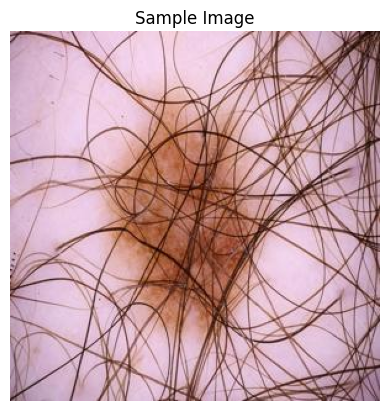

In [5]:
sample_path = "test-dataset_raw/train/benign/melanoma_28.jpg"

sample_img = cv2.imread(sample_path)
print("Loaded:", sample_path)

plt.imshow(cv2.cvtColor(sample_img, cv2.COLOR_BGR2RGB))
plt.title("Sample Image")
plt.axis("off")


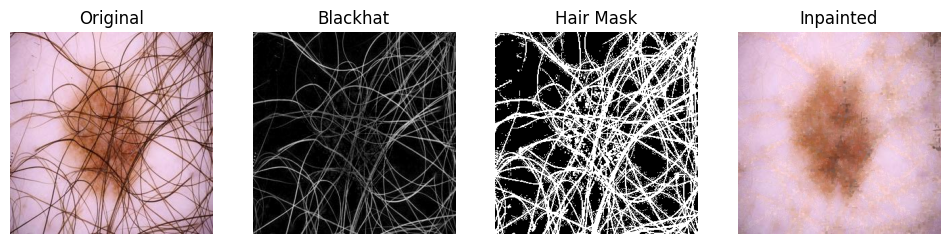

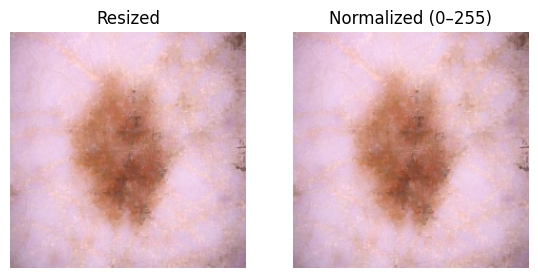

In [6]:
original = sample_img.copy()

# Step 1: Hair removal
hair_removed = remove_hair(original, show_steps=True)

# Step 2: Resize
resized = cv2.resize(hair_removed, image_size)

# Step 3: Normalize (0–255)
normalized = (resized / 255.0 * 255).astype(np.uint8)

# Show comparison
show_compare(resized, normalized)


In [7]:
def preprocess_and_save(input_dir, output_dir):
    Path(output_dir).mkdir(parents=True, exist_ok=True)

    for img_name in tqdm(os.listdir(input_dir), desc=f"Processing {input_dir}"):
        img_path = os.path.join(input_dir, img_name)

        if not img_path.lower().endswith((".jpg", ".jpeg", ".png")):
            continue

        img = cv2.imread(img_path)
        if img is None:
            continue

        # 1. Hair removal
        img = remove_hair(img)

        # 2. Resize
        img = cv2.resize(img, image_size)

        # 3. Normalize
        img = (img / 255.0 * 255).astype(np.uint8)

        # Save
        save_path = os.path.join(output_dir, img_name)
        cv2.imwrite(save_path, img)


In [8]:
def preprocess_dataset(input_base, output_base):
    for split in ["train", "test"]:
        input_split = os.path.join(input_base, split)
        output_split = os.path.join(output_base, split)

        for cls in os.listdir(input_split):
            input_cls = os.path.join(input_split, cls)
            output_cls = os.path.join(output_split, cls)

            if os.path.isdir(input_cls):
                preprocess_and_save(input_cls, output_cls)

preprocess_dataset(input_base, output_base)
print("✅ Preprocessing complete. Preprocessed dataset saved to:", output_base)


Processing test-dataset_raw\test\malignant: 100%|██████████| 5/5 [00:00<00:00, 45.01it/s]

✅ Preprocessing complete. Preprocessed dataset saved to: test-dataset_Preprocessed
